# Filtración colaborativa

importar librerías

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from sklearn.model_selection import train_test_split

Cargar datos

In [2]:
data = pd.read_csv('users_ratings_books.csv')
data.head()

,Unnamed: 0,User-ID,Location,Age,RealCountry,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0,2,"stockton, california, usa",18.0,usa,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,1,10,"albacete, wisconsin, spain",26.0,spain,1841721522,0,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters &amp; Small Ltd
2,2,3675,"barcelona, catalunya, spain",24.0,spain,1841721522,0,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters &amp; Small Ltd
3,3,6366,"madrid, madrid, spain",20.0,spain,1841721522,7,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters &amp; Small Ltd
4,4,13872,"barcelona, catalunya, spain",17.0,spain,1841721522,0,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters &amp; Small Ltd


In [3]:
data = data.sample(n=50000)
data.head()

,Unnamed: 0,User-ID,Location,Age,RealCountry,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
636024,636024,180280,"st. gallen, st. gallen, switzerland",23.0,switzerland,3502102465,10,Anna schreibt an Mister Gott. Neues von Anna Ã...,Fynn,1987,Scherz
316570,316570,155916,"perth, western australia, australia",27.0,australia,1561707228,10,"God, Creation, and Tools for Life",Sylvia Browne,2000,Hay House
560372,560372,82831,"nashville, tennessee, usa",21.0,usa,0963960733,0,Meet the Malones (Beany Malone),Lenora Mattingly Weber,1999,Image Cascade Publishing
595938,595938,101606,"niagara falls, ontario, canada",32.0,canada,0385298730,7,Chung Kuo: The Middle Kingdom (Chung Kuo),David Wingrove,1990,Bantam Dell Pub Group
209267,209267,255629,"cottage grove, minnesota, usa",51.0,usa,0515132187,8,The Villa,Nora Roberts,2002,Jove Books


In [4]:
data = data[['User-ID', 'ISBN', 'Book-Rating']]



In [18]:
data['User-ID'] = data['User-ID'].astype('category').cat.codes
data['ISBN'] = data['ISBN'].astype('category').cat.codes

In [20]:
data['User-ID']

636024     7877
316570     6853
560372     3632
595938     4474
209267    11281
          ...  
229687     5641
13635     12013
261835     2378
479443     7187
199841    10860
Name: User-ID, Length: 50000, dtype: int16

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 636024 to 199841
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   User-ID      50000 non-null  int16
 1   ISBN         50000 non-null  int32
 2   Book-Rating  50000 non-null  int64
dtypes: int16(1), int32(1), int64(1)
memory usage: 1.0 MB


In [22]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 636024 to 199841
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   User-ID      50000 non-null  category
 1   ISBN         50000 non-null  category
 2   Book-Rating  50000 non-null  int64   
dtypes: category(2), int64(1)
memory usage: 2.7 MB


In [23]:

# Definir la arquitectura de la red neuronal
user_input = Input(shape=(1,))
book_input = Input(shape=(1,))

user_embedding = Embedding(input_dim=data['User-ID'].nunique(), output_dim=50)(user_input)
book_embedding = Embedding(input_dim=data['ISBN'].nunique(), output_dim=50)(book_input)

user_flat = Flatten()(user_embedding)
book_flat = Flatten()(book_embedding)

concat = Concatenate()([user_flat, book_flat])

dense1 = Dense(128, activation='relu')(concat)
dense2 = Dense(64, activation='relu')(dense1)
output = Dense(1)(dense2)


In [24]:

# Dividir los datos en conjuntos de entrenamiento y prueba

model = tf.keras.Model(inputs=[user_input, book_input], outputs=output)

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit([train['User-ID'], train['ISBN']], train['Book-Rating'], epochs=10, batch_size=64)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate([test['User-ID'], test['ISBN']], test['Book-Rating'])
print(f'RMSE en el conjunto de prueba: {loss**0.5}')

Epoch 1/10
625/625 [==============================] - 21s 31ms/step - loss: 13.2217
Epoch 2/10
625/625 [==============================] - 20s 32ms/step - loss: 7.4053
Epoch 3/10
625/625 [==============================] - 23s 36ms/step - loss: 3.6366
Epoch 4/10
625/625 [==============================] - 22s 36ms/step - loss: 2.3651
Epoch 5/10
625/625 [==============================] - 23s 37ms/step - loss: 1.6770
Epoch 6/10
625/625 [==============================] - 20s 32ms/step - loss: 1.2159
Epoch 7/10
625/625 [==============================] - 19s 30ms/step - loss: 0.8905
Epoch 8/10
625/625 [==============================] - 22s 35ms/step - loss: 0.6757
Epoch 9/10
625/625 [==============================] - 19s 30ms/step - loss: 0.5207
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 16.7437
RMSE en el conjunto de prueba: 4.09190175506995


In [25]:
import matplotlib.pyplot as plt

Minimum MSE:  0.4152364730834961


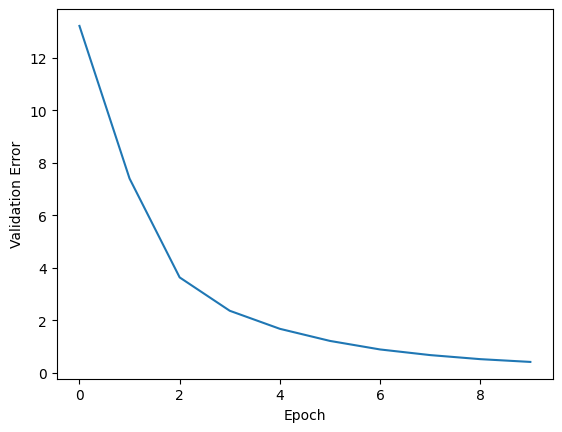

In [26]:
pd.Series(history.history['loss']).plot(logy=False)
plt.xlabel("Epoch")
plt.ylabel("Validation Error")
print('Minimum MSE: ', min(history.history['loss']))